In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sympy import *
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
273 * 120 / 100

327.6

In [7]:
90 * 273 / 327.6 + 273

348.0

## Rieman Kanan (cari error terbesar (terbaik) sebagai penentuan a/b)

In [46]:
a = 0
b = 2
n = 4
x = np.linspace(a, b , n+1)
f = lambda x: 1/2 * x**2 + 1

# Symbols for derivative
xs = symbols('x')
ys = 1/2 * xs**2 + 1
ys

0.5*x**2 + 1

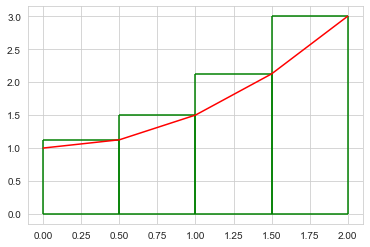

Luas : 3.875, Error : 1.0000000000


In [47]:
def rieman_kanan (x, y):
    luas_besar = 0
    luas_besar_list = []
    
    plt.plot(x, y, c='red')
    
    for i in range(len(x)-1):
        luas_kecil = y[i+1] * (x[i+1] - x[i])
        luas_besar += luas_kecil
        luas_besar_list.append(luas_kecil)
        plt.vlines(x=x[i+1], ymax=y[i+1], ymin=0, colors='green')
        plt.vlines(x=x[i], ymax=y[i+1], ymin=0, colors='green')
        plt.hlines(y=y[i+1], xmax=x[i+1], xmin=x[i], colors='green')
        plt.hlines(y=0, xmax=x[i+1], xmin=x[i], colors='green')
        
    plt.show()
    
    # Error
    der = diff(ys, xs, 1)
    z = lambdify('x', expr=der)
    error = np.abs(-(b-a)**2 * z(b) / (2*n)) # CHANGE A AND B
    
    print(f'Luas : {luas_besar}, Error : {error:.10f}')


def rieman_kanan_abs(x, y):
    y = np.absolute(y)
    luas_besar = 0
    luas_besar_list = []
    
    plt.plot(x, y, c='red')
    
    for i in range(len(x)-1):
        luas_kecil = y[i+1] * (x[i+1] - x[i])
        luas_besar += luas_kecil
        luas_besar_list.append(luas_kecil)
        plt.vlines(x=x[i+1], ymax=y[i+1], ymin=0, colors='green')
        plt.vlines(x=x[i], ymax=y[i+1], ymin=0, colors='green')
        plt.hlines(y=y[i+1], xmax=x[i+1], xmin=x[i], colors='green')
        plt.hlines(y=0, xmax=x[i+1], xmin=x[i], colors='green')
        
    plt.show()
    
    return luas_besar

rieman_kanan(x, f(x))

## Rieman Kiri

In [44]:
a = 0
b = 2
n = 4
x = np.linspace(a, b , n+1)
f = lambda x: x+1

# Symbols for derivative
xs = symbols('x')
ys = xs + 1
ys

x + 1

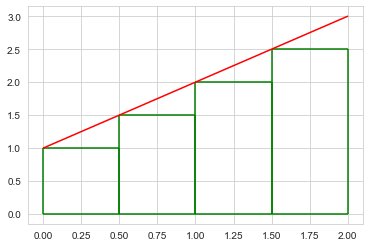

Luas : 3.5, Error : 0.5000000000


In [45]:
def rieman_kiri(x, y):
    luas_besar = 0
    luas_besar_list = []
    
    plt.plot(x, y, c='red')
    
    for i in range(len(x)-1):
        luas_kecil = y[i] * (x[i+1] - x[i])
        luas_besar += luas_kecil
        luas_besar_list.append(luas_kecil)
        plt.vlines(x=x[i], ymax=y[i], ymin=0, colors='green')
        plt.vlines(x=x[i+1], ymax=y[i], ymin=0, colors='green')
        plt.hlines(y=y[i], xmax=x[i+1], xmin=x[i], colors='green')
        plt.hlines(y=0, xmax=x[i+1], xmin=x[i], colors='green')
        
    plt.show()
    
    # Error
    der = diff(ys, xs, 1)
    z = lambdify('x', expr=der)
    error = np.abs((b-a)**2 * z(b) / (2*n))
    
    print(f'Luas : {luas_besar}, Error : {error:.10f}')



def rieman_kiri_abs(x, y):
    y = np.abs(y)
    luas_besar = 0
    luas_besar_list = []
    
    plt.plot(x, y, c='red')
    
    for i in range(len(x)-1):
        luas_kecil = y[i] * (x[i+1] - x[i])
        luas_besar += luas_kecil
        luas_besar_list.append(luas_kecil)
        plt.vlines(x=x[i], ymax=y[i], ymin=0, colors='green')
        plt.vlines(x=x[i+1], ymax=y[i], ymin=0, colors='green')
        plt.hlines(y=y[i], xmax=x[i+1], xmin=x[i], colors='green')
        plt.hlines(y=0, xmax=x[i+1], xmin=x[i], colors='green')
        
    plt.show()
    
    return luas_besar
    
    
rieman_kiri(x, f(x))

## Rieman Tengah

In [2]:
a = 1
b = x
n = 1000
t = np.linspace(a, b , n+1)
f = lambda t: 1/(t**2 + 1)

# Symbols for derivative
ts = symbols('t')
ys = 1/(ts**2 + 1)
ys

NameError: name 'x' is not defined

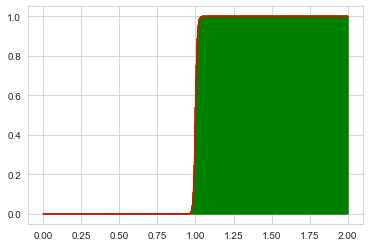

Luas : 1.0
Luas : 1.0, Error : 0.0000000000


In [45]:
def rieman_tengah(x, y):
    x_tengah = np.mean([(x[i+1] - x[i])/2 for i in range(len(x)-1)])
    x_new = [i + x_tengah for i in np.array(x)]
    y_new = f(np.array(x_new))
    luas_besar = 0
    luas_besar_list = []
    
    plt.plot(x, y, c='red')
    
    for i in range(len(x)-1):
        luas_kecil = y_new[i] * (x[i+1] - x[i])
        luas_besar += luas_kecil
        luas_besar_list.append(luas_kecil)
        plt.vlines(x=x[i], ymax=y_new[i], ymin=0, colors='green')
        plt.vlines(x=x[i+1], ymax=y_new[i], ymin=0, colors='green')
        plt.hlines(y=y_new[i], xmax=x[i+1], xmin=x[i], colors='green')
        plt.hlines(y=0, xmax=x[i+1], xmin=x[i], colors='green')
        
    plt.show()
    print(f'Luas : {luas_besar}')
          
    # Error
    der = diff(ys, xs, 2)
    z = lambdify('x', expr=der)
    error = np.abs((b-a)**3 * z(a) / (24 * n**2))
    
    print(f'Luas : {luas_besar}, Error : {error:.10f}')


def rieman_tengah_abs(x, y):
    y = np.abs(y)
    x_tengah = np.mean([(x[i+1] - x[i])/2 for i in range(len(x)-1)])
    x_new = [i + x_tengah for i in np.array(x)]
    y_new = f(np.array(x_new))
    y_new = np.abs(y_new)
    luas_besar = 0
    luas_besar_list = []
    
    plt.plot(x, y, c='red')
    
    for i in range(len(x)-1):
        luas_kecil = y_new[i] * (x[i+1] - x[i])
        luas_besar += luas_kecil
        luas_besar_list.append(luas_kecil)
        plt.vlines(x=x[i], ymax=y_new[i], ymin=0, colors='green')
        plt.vlines(x=x[i+1], ymax=y_new[i], ymin=0, colors='green')
        plt.hlines(y=y_new[i], xmax=x[i+1], xmin=x[i], colors='green')
        plt.hlines(y=0, xmax=x[i+1], xmin=x[i], colors='green')
        
    plt.show()
    
    return luas_besar
    
    
rieman_tengah(x, f(x))

In [25]:
2.33 + 2.5

4.83

In [28]:
5/2 * np.pi

7.853981633974483

## Trapezoidal Rule

In [143]:
# Error dicari yang paling besar ketika ingin menentukan jumlah n
a = -1
b = 2
n = 100
x = np.linspace(a, b , n+1)
f = lambda x: x**3 - 3*(x**2) -x + 3

# Symbols for derivative
xs = symbols('x')
ys = xs**3 - 3*(xs**2) -xs + 3 # in a form of xs
ys

x**3 - 3*x**2 - x + 3

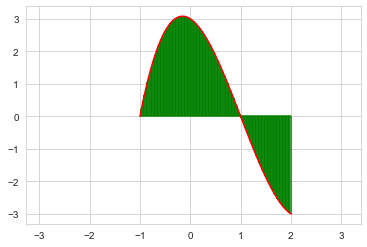

Luas : 2.249325, Error : 0.0013500000


In [150]:
def trapezoid_rule(x, y):
    luas_besar = 0
    luas_besar_list = []
    
    plt.plot(x, y, c='red')
    
    for i in range(len(x)-1):
        luas_kecil = 0.5 * (y[i+1] + y[i]) * (x[i+1] - x[i])
        luas_besar += luas_kecil
        luas_besar_list.append(luas_kecil)
        plt.vlines(x=x[i+1], ymax=y[i+1], ymin=0, colors='green')
        plt.vlines(x=x[i], ymax=y[i], ymin=0, colors='green')
        plt.plot(y[i], y[i+1], c='green')
        plt.hlines(y=0, xmax=x[i+1], xmin=x[i], colors='green')
        
    plt.show()
    
    # Error
    der = diff(ys, xs, 2)
    z = lambdify('x', expr=der)
    error = np.abs(-(b-a)**3 * z(b) / (12 * n**2))
    
    print(f'Luas : {luas_besar}, Error : {error:.10f}')

trapezoid_rule(x, f(x))

## Parabolic Rule

In [5]:
a = 3
b = 6
n = 1000
x = np.linspace(a, b , n+1)
f = lambda x: x**2 - 6*x + 2

# Symbols for derivative
xs = symbols('x')
ys = 624 * 200 * (50*((3)**0.5) - xs) / sin(pi/3)
ys

2*sqrt(3)*(10807997.0392298 - 124800*x)/3

In [6]:
def parabolic_rule_no_incude_error_val(x, y):
    luas_besar = 0
    luas_besar_list = []
    
    plt.plot(x, y, c='red')
    
    for i in range(0, len(x)-2, 2):
        luas_kecil = ((x[i+1] - x[i])/3) * (y[i] + 4*y[i+1] + y[i+2])
        luas_besar += luas_kecil
        luas_besar_list.append(luas_kecil)
        plt.vlines(x=x[i+1], ymax=y[i+1], ymin=0, colors='green')
        plt.vlines(x=x[i], ymax=y[i], ymin=0, colors='green')
        plt.vlines(x=x[i-1], ymax=y[i-1], ymin=0, colors='green')
        plt.plot(y[i], y[i+1], c='green')
        plt.hlines(y=0, xmax=x[i+1], xmin=x[i], colors='green')
        plt.hlines(y=0, xmax=x[i], xmin=x[i-1], colors='green')

    plt.show()
    
    print(f'Luas : {luas_besar}')
    
def parabolic_rule_no_incude_error_val_abs(x, y):
    y = np.abs(y)
    luas_besar = 0
    luas_besar_list = []
    
    plt.plot(x, y, c='red')
    
    for i in range(0, len(x)-2, 2):
        luas_kecil = ((x[i+1] - x[i])/3) * (y[i] + 4*y[i+1] + y[i+2])
        luas_besar += luas_kecil
        luas_besar_list.append(luas_kecil)
        plt.vlines(x=x[i+1], ymax=y[i+1], ymin=0, colors='green')
        plt.vlines(x=x[i], ymax=y[i], ymin=0, colors='green')
        plt.vlines(x=x[i-1], ymax=y[i-1], ymin=0, colors='green')
        plt.plot(y[i], y[i+1], c='green')
        plt.hlines(y=0, xmax=x[i+1], xmin=x[i], colors='green')
        plt.hlines(y=0, xmax=x[i], xmin=x[i-1], colors='green')

    plt.show()
    
    print(f'Luas : {luas_besar}')


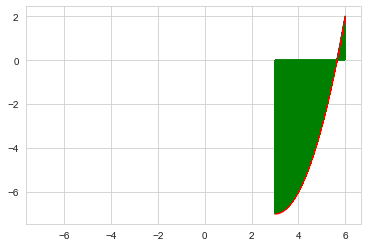

Luas : -11.999999999999986


In [7]:
def parabolic_rule(x, y):
    luas_besar = 0
    luas_besar_list = []
    
    plt.plot(x, y, c='red')
    
    for i in range(0, len(x)-2, 2):
        luas_kecil = ((x[i+1] - x[i])/3) * (y[i] + 4*y[i+1] + y[i+2])
        luas_besar += luas_kecil
        luas_besar_list.append(luas_kecil)
        plt.vlines(x=x[i+1], ymax=y[i+1], ymin=0, colors='green')
        plt.vlines(x=x[i], ymax=y[i], ymin=0, colors='green')
        plt.vlines(x=x[i-1], ymax=y[i-1], ymin=0, colors='green')
        plt.plot(y[i], y[i+1], c='green')
        plt.hlines(y=0, xmax=x[i+1], xmin=x[i], colors='green')
        plt.hlines(y=0, xmax=x[i], xmin=x[i-1], colors='green')

    plt.show()
    
    # Error
    der = diff(ys, xs, 4)
    z = lambdify('x', expr=der)
    error = np.abs(-(b-a)**5 * z(b) / (180 * n**4))
    
    print(f'Luas : {luas_besar}, Error : {error:.10f}')


def parabolic_rule_abs(x, y):
    y = np.abs(y)
    luas_besar = 0
    luas_besar_list = []
    
    plt.plot(x, y, c='red')
    
    for i in range(0, len(x)-2, 2):
        luas_kecil = ((x[i+1] - x[i])/3) * (y[i] + 4*y[i+1] + y[i+2])
        luas_besar += luas_kecil
        luas_besar_list.append(luas_kecil)
        plt.vlines(x=x[i+1], ymax=y[i+1], ymin=0, colors='green')
        plt.vlines(x=x[i], ymax=y[i], ymin=0, colors='green')
        plt.vlines(x=x[i-1], ymax=y[i-1], ymin=0, colors='green')
        plt.plot(y[i], y[i+1], c='green')
        plt.hlines(y=0, xmax=x[i+1], xmin=x[i], colors='green')
        plt.hlines(y=0, xmax=x[i], xmin=x[i-1], colors='green')

    plt.show()
    
    # Error
    der = diff(ys, xs, 4)
    z = lambdify('x', expr=der)
    error = np.abs(-(b-a)**5 * z(b) / (180 * n**4))
    
    print(f'Luas : {luas_besar}, Error : {error:.10f}')

parabolic_rule_no_incude_error_val(x, f(x))

## Rieman Kanan (Find n) -- Cari error terbesar untuk menentukan a/b

In [165]:
a = 1
b = 9
error_rate = 0.1

# Symbols for derivative
xs = symbols('x')
ys = xs**2 + 1
ys

x**2 + 1

In [167]:
def rieman_kanan_find_n(xs, ys):
    
    # Error
    n_final = 0
    der = diff(ys, xs, 1)
    z = lambdify('x', expr=der)
    for n in range(1, 1000000):
        error = np.abs(-(b-a)**2 * z(b) / (2*n))
        if error <= error_rate:
            n_final += n
            break
    
    print(f'Error : {error_rate:.7f} didapat dengan memotong grafik sebanyak n : {n_final} bagian')

rieman_kanan_find_n(xs, ys)

Error : 0.1000000 didapat dengan memotong grafik sebanyak n : 5760 bagian


## Rieman Kiri (Find n)

In [29]:
a = 1
b = 4
error_rate = 0.00001

# Symbols for derivative
xs = symbols('x')
ys = (1 / (1 + xs))

In [30]:
def rieman_kiri_find_n(xs, ys):
    
    # Error
    n_final = 0
    der = diff(ys, xs, 1)
    z = lambdify('x', expr=der)
    for n in range(1, 1000000):
        error = np.abs((b-a)**2 * z(a) / (2*n))
        if error <= error_rate:
            n_final += n
            break
    
    print(f'Error : {error_rate:.7f} didapat dengan memotong grafik sebanyak n : {n_final} bagian')

rieman_kiri_find_n(xs, ys)

Error : 0.0000100 didapat dengan memotong grafik sebanyak n : 112500 bagian


## Rieman Tengah (Find n)

In [18]:
a = 1
b = 4
error_rate = 0.00001

# Symbols for derivative
xs = symbols('x')
ys = (1 / (1 + xs))

In [19]:
def rieman_tengah_find_n(xs, ys):
    
    # Error
    n_final = 0
    der = diff(ys, xs, 2)
    z = lambdify('x', expr=der)
    for n in range(1, 1000000):
        error = np.abs((b-a)**3 * z(a) / (24 * n**2))
        if error <= error_rate:
            n_final += n
            break
    
    print(f'Error : {error_rate:.7f} didapat dengan memotong grafik sebanyak n : {n_final} bagian')

rieman_tengah_find_n(xs, ys)

Error : 0.0000100 didapat dengan memotong grafik sebanyak n : 168 bagian


## Trapezoidal Rule (Find n)

In [20]:
a = 1
b = 4
error_rate = 0.00001

# Symbols for derivative
xs = symbols('x')
ys = (1 / (1 + xs))

In [21]:
def trapezoidal_rule_find_n(xs, ys):
    
    # Error
    n_final = 0
    der = diff(ys, xs, 2)
    z = lambdify('x', expr=der)
    for n in range(1, 1000000):
        error = np.abs(-(b-a)**3 * z(a) / (12 * n**2))
        if error <= error_rate:
            n_final += n
            break
    
    print(f'Error : {error_rate:.7f} didapat dengan memotong grafik sebanyak n : {n_final} bagian')

trapezoidal_rule_find_n(xs, ys)

Error : 0.0000100 didapat dengan memotong grafik sebanyak n : 238 bagian


## Parabolic Rule (Find n)

In [13]:
a = 1
b = 4
error_rate = 0.00001

# Symbols for derivative
xs = symbols('x')
ys = (1 / (1 + xs))

In [14]:
def parabolic_rule_find_n(xs, ys):
    
    # Error
    n_final = 0
    der = diff(ys, xs, 4)
    z = lambdify('x', expr=der)
    for n in range(1, 1000000):
        error = np.abs(-(b-a)**5 * z(a) / (180 * n**4))
        if error <= error_rate:
            n_final += n
            break
    
    print(f'Error : {error_rate:.7f} didapat dengan memotong grafik sebanyak n : {n_final} bagian')

parabolic_rule_find_n(xs, ys)

Error : 0.0000100 didapat dengan memotong grafik sebanyak n : 18 bagian


## Integral

In [7]:
from sympy import *
x = symbols('x')
y = x**(1/3) + x**(4/3)
y

x**0.333333333333333 + x**1.33333333333333

In [9]:
integrate(y, (x, 1, 8))

65.6785714285714

## Turunan

In [2]:
import tensorflow as tf

In [3]:
a = 0
b = 3
n = 100
x = np.linspace(a, b , n+1)
x = tf.constant(x)

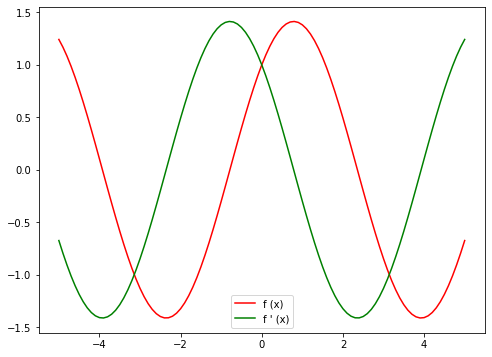

In [749]:
with tf.GradientTape() as grad:
    grad.watch(x)
    y = tf.sin(x) + tf.cos(x)
    dy_dx = grad.gradient(y, x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f (x)', c='red')
plt.plot(x, dy_dx, label="f ' (x)", c='green')
plt.legend();

#### Nilai turunan ketika X = ...

In [750]:
X = 0

loc = np.argmax(x == X)

print(f"Nilai f'(x) ketika x = {X} adalah {dy_dx[loc].numpy()}")

Nilai f'(x) ketika x = 0 adalah 1.0


## Distance, Velocity, Acceleration

In [789]:
a = 0 # t = 0s
b = 5 # t = 5s
n = 100
t = np.linspace(a, b , n+1)
t = tf.constant(t)

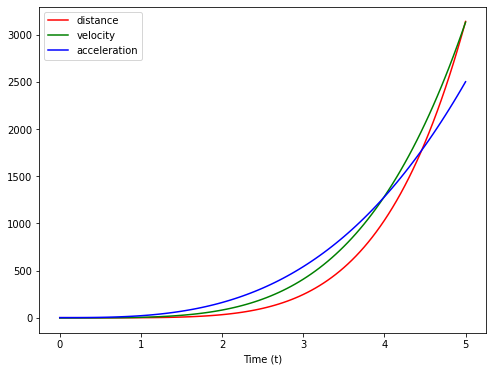

In [790]:
with tf.GradientTape() as grad:
    grad.watch(t)
    with tf.GradientTape() as grad_2:
        grad_2.watch(t)
        y = t**5 + (t-1)**2
    dy_dx = grad_2.gradient(y, t)
dy2_dx2 = grad.gradient(dy_dx, t)

plt.figure(figsize=(8, 6))
plt.plot(t, y, label='distance', c='red')
plt.plot(t, dy_dx, label="velocity", c='green')
plt.plot(t, dy2_dx2, label="acceleration", c='blue')
plt.xlabel('Time (t)')

plt.legend();

#### Mencari nilai Acceleration, Velocity, Distance jika diberi tahu Time

In [791]:
time = 3

loc = np.argmax(t == time)

print(f"""
Nilai Distance saat t = {time} s adalah {y[loc]} m
Nilai Velocity saat t = {time} s adalah {dy_dx[loc]} m/s
Nilai Acceleration saat t = {time} s adalah {dy2_dx2[loc]} m/s2
""")


Nilai Distance saat t = 3 s adalah 247.0 m
Nilai Velocity saat t = 3 s adalah 409.0 m/s
Nilai Acceleration saat t = 3 s adalah 542.0 m/s2



## Luas diantara 2 kurva (y = mx + c)

In [11]:
a = -5
b = 6
n = 1000
x = np.linspace(a, b , n+1)

f = lambda x: 2 * (x**0.5)
g = lambda x: 5/2 - x/2

C:\Users\Acer\AppData\Local\Temp/ipykernel_2120/411775987.py:6: RuntimeWarning: invalid value encountered in sqrt
  f = lambda x: 2 * (x**0.5)


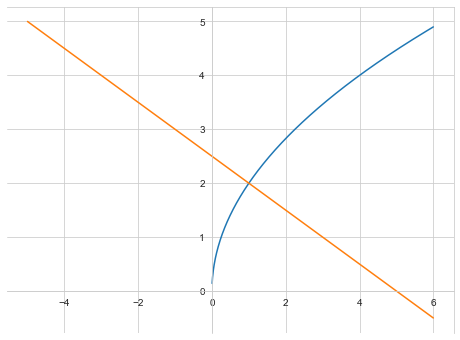

In [12]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

ax.plot(x, f(x))
ax.plot(x, g(x))

600


C:\Users\Acer\AppData\Local\Temp/ipykernel_2120/657815042.py:6: RuntimeWarning: invalid value encountered in sqrt
  f = lambda x: 2 * (x**0.5)


TypeError: object of type 'int' has no len()

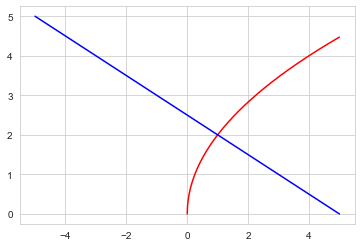

In [10]:
def area_between(x, y, g):
    luas_besar = 0
    luas_besar_list = []
    
    plt.plot(x, y, c='red')
    plt.plot(x, g, c='blue')
    
    loc =  np.squeeze(np.argwhere(np.isclose(y, g, rtol=10**(-2.8), atol=10**(-2.8)))).tolist()
    print(loc)
    assert len(loc) == 2
    print(f'Grafik berpotongan di titik x = {x[loc[0]]} dan x = {x[loc[1]]}')
    
    for i in range(loc[0], loc[1]):
        if y[i] >= g[i]:
            y_max_before = y[i]
            y_min_before = g[i]
            y_max_after = y[i+1]
            y_min_after = g[i+1]
            distance_before = y_max_after - y_min_before # Use y max after to make trapesium
            distance_after = y_max_after - y_min_after
            luas = 0.5 * (distance_after + distance_before) * (x[i+1] - x[i])
            luas_besar += luas
            luas_besar_list.append(luas)
            
        else:
            y_max_before = g[i]
            y_min_before = y[i]
            y_max_after = g[i+1]
            y_min_after = y[i+1]
            distance_before = y_max_after - y_min_before # Use y max after to make trapesium
            distance_after = y_max_after - y_min_after
            luas = 0.5 * (distance_after + distance_before) * (x[i+1] - x[i])
            luas_besar += luas
            luas_besar_list.append(luas)
        
        plt.vlines(x=x[i], ymax=y_max_after, ymin=y_max_before)
        plt.vlines(x=x[i+1], ymax=y_max_after, ymin=y_min_after)
        plt.hlines(y=y_max_after, xmin=x[i], xmax=x[i+1])
        
        
    plt.show()
    
    print(f'Luas Area diantara 2 kurva adalah {luas_besar}')
    

area_between(x, f(x), g(x))

[92, 970]
Grafik berpotongan di titik x = -4.233333333333333 dan x = 3.083333333333334


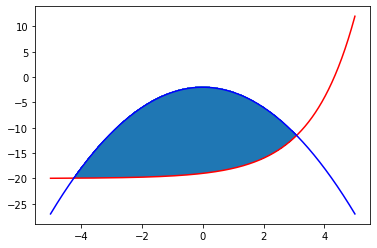

Luas Area diantara 2 kurva adalah 84.52408142519337


In [1162]:
a = -5
b = 5
n = 1200
x = np.linspace(a, b , n+1)

f = lambda x: 2**x - 20
g = lambda x: -x**2 - 2

area_between(x, f(x), g(x))

[2077, 7414]
Grafik berpotongan di titik x = -2.923 dan x = 2.4140000000000006


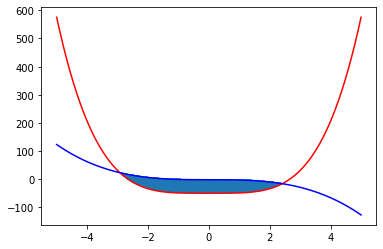

Luas Area diantara 2 kurva adalah 206.8462115698459


In [1175]:
a = -5
b = 5
n = 10000
x = np.linspace(a, b , n+1)

f = lambda x: x**4 - 50
g = lambda x: -x**3 - 2

area_between(x, f(x), g(x))

[250, 625]
Grafik berpotongan di titik x = -2.0 dan x = 1.0


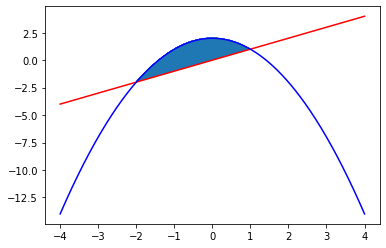

Luas Area diantara 2 kurva adalah 4.511680767999999


In [1208]:
a = -4
b = 4
n = 1000
x = np.linspace(a, b , n+1)

f = lambda x: x
g = lambda x: 2 - x**2

area_between(x, f(x), g(x))

## Area between (x = ..y + c)

In [28]:
a = -5
b = 5
n = 1000 
y = np.linspace(a, b, n+1)
x1 = lambda y: 1 / (y**2)
x2 = lambda y: np.array([1 for i in y]) # x = 1
x3 = lambda y: np.array([4 for i in y]) # x = 4

C:\Users\Acer\AppData\Local\Temp/ipykernel_7132/1736215246.py:5: RuntimeWarning: invalid value encountered in sqrt
  x1 = lambda y: y**(0.5)


[500, 900]
Grafik berpotongan di titik y = 0.0 dan y = 4.0


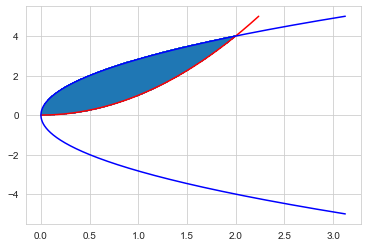

Luas Area diantara 2 kurva adalah 2.666452530441524


In [29]:
def area_between(x1, x2, y):
    luas_besar = 0
    luas_besar_list = []
    
    plt.plot(x1, y, c='red')
    plt.plot(x2, y, c='blue')
    
    loc =  np.squeeze(np.argwhere(np.isclose(x1, x2, rtol=10**(-5), atol=10**(-5)))).tolist()
    print(loc)
    assert len(loc) == 2
    print(f'Grafik berpotongan di titik y = {y[loc[0]]} dan y = {y[loc[1]]}')
    
    for i in range(loc[0], loc[1]):
        if x1[i] >= x2[i]:
            x_max_before = x1[i]
            x_min_before = x2[i]
            x_max_after = x1[i+1]
            x_min_after = x2[i+1]
            distance = y[i+1] - y[i]
            luas = (x_max_before - x_min_before) * distance
            luas_besar += luas
            luas_besar_list.append(luas)
            
        else:
            x_max_before = x2[i]
            x_min_before = x1[i]
            x_max_after = x2[i+1]
            x_min_after = x1[i+1]
            distance = y[i+1] - y[i]
            luas = (x_max_before - x_min_before) * distance
            luas_besar += luas
            luas_besar_list.append(luas)
            pass
        
        plt.hlines(y=y[i], xmax=x_max_before, xmin=x_min_before)
        plt.hlines(y=y[i+1], xmax=x_max_before, xmin=x_min_before)
        plt.vlines(x=x_max_before, ymax=y[i+1], ymin=y[i])
        
        
    plt.show()
    
    print(f'Luas Area diantara 2 kurva adalah {luas_besar}')
    

area_between(x1=x1(y), x2=x2(y), y=y)

## Volume Benda Putar (X-Axis) Vertical Slicing (dx)

In [290]:
a = 0
b = 3
n = 10000
x = np.linspace(a, b , n+1)

f = lambda x: 3 + 2*x - x**2
g = lambda x: np.array([0 for i in x]) # y = 0

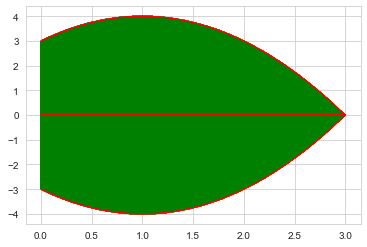

96.13274933703683

In [256]:
volume_benda_putar_x_slab(x, f, g)

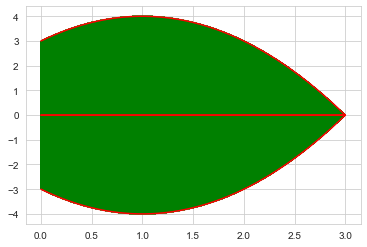

96.1369760671865


In [293]:
def volume_benda_putar_dx_thd_y(x, f, g, thd_y):
    luas_besar = 0
    luas_besar_list = []
    
    
    d = 0
    if np.abs(f[0] - thd_y) <= np.abs(g[0] - thd_y): # distance dari x1 lebih dekat
        d = np.abs(f[0] - thd_y)
    else:
        d = np.abs(g[0] - thd_y)
        
    plt.plot(x, f, c='red')
    plt.plot(x, g, c='red')
    plt.plot(x, -f-d, c='red')
    plt.plot(x, -g-d, c='red')
    
    for i in range(len(x)-1):
        if f[i] >= g[i]:
            y_max_before = f[i]
            y_min_before = g[i]
            y_max_after = f[i+1]
            y_min_after = g[i+1]
            distance = x[i+1] - x[i]
            luas = (np.pi * (d + y_max_before - y_min_before)**2 * distance) - (np.pi * (d**2) * distance)
            luas_besar += luas
            luas_besar_list.append(luas)
            
        else:
            y_max_before = g[i]
            y_min_before = f[i]
            y_max_after = g[i+1]
            y_min_after = f[i+1]
            distance = x[i+1] - x[i]
            luas = (np.pi * (d + y_max_before - y_min_before)**2 * distance) - (np.pi * (d**2) * distance)
            luas_besar += luas
            luas_besar_list.append(luas)
            pass
      
        plt.vlines(x=x[i], ymin=y_min_before, ymax=y_max_before, colors='green')
        plt.vlines(x=x[i+1], ymin=y_min_before, ymax=y_max_before, colors='green')
        plt.vlines(x=x[i], ymin=-y_min_before -d, ymax=-y_max_before -d, colors='green')
        plt.vlines(x=x[i+1], ymin=-y_min_before -d, ymax=-y_max_before -d, colors='green')
        plt.hlines(y=y_max_before, xmin=x[i], xmax=x[i+1], colors='green')
        plt.hlines(y=-y_max_before -d, xmin=x[i], xmax=x[i+1], colors='green')
        
    
        
    plt.show()
    
    print(luas_besar)
    

volume_benda_putar_dx_thd_y(x=x, f=f(x), g=g(x), thd_y=0)

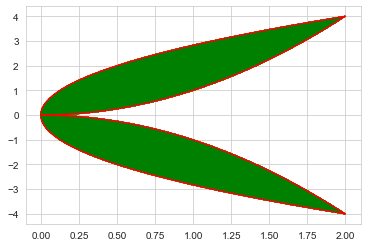

30.15930622961991

In [184]:
def volume_benda_putar_x_slab(x, y, g):
    x_tengah = np.mean([(x[i+1] - x[i])/2 for i in range(len(x)-1)])
    x_new = [i + x_tengah for i in np.array(x)]
    y_new = f(np.array(x_new))
    g_new = g(np.array(x_new))
    luas_besar = 0
    luas_besar_list = []
    
    plt.plot(x, y_new, c='red')
    plt.plot(x, g_new, c='red')
    plt.plot(x, -y_new, c='red')
    plt.plot(x, -g_new, c='red')
    
    for i in range(len(x)-1):
        if g_new[i] > y_new[i]:
            luas_kecil = np.pi * ((g_new[i]**2) - (y_new[i]**2)) * (x[i+1] - x[i]) # np.pi * r^2 * dx
            upper = g_new
            lower = y_new
            luas_besar += luas_kecil
            luas_besar_list.append(luas_kecil)
        else:
            luas_kecil = np.pi * ((y_new[i]**2) - (g_new[i]**2)) * (x[i+1] - x[i]) # np.pi * r^2 * dx
            upper = y_new
            lower = g_new
            luas_besar += luas_kecil
            luas_besar_list.append(luas_kecil)
            
        plt.vlines(x=x[i], ymax=upper[i], ymin=lower[i], colors='green')
        plt.vlines(x=x[i+1], ymax=upper[i], ymin=lower[i], colors='green')
        plt.vlines(x=x[i], ymax=-upper[i], ymin=-lower[i], colors='green')
        plt.vlines(x=x[i+1], ymax=-upper[i], ymin=-lower[i], colors='green')
        
        plt.hlines(y=upper[i], xmax=x[i+1], xmin=x[i], colors='green')
        plt.hlines(y=lower[i], xmax=x[i+1], xmin=x[i], colors='green')
        plt.hlines(y=-upper[i], xmax=x[i+1], xmin=x[i], colors='green')
        plt.hlines(y=-lower[i], xmax=x[i+1], xmin=x[i], colors='green')
        
    plt.show()
    
    return luas_besar
       
volume_benda_putar_x_slab(x, f, g)

In [123]:
a = 0
b = 4
n = 1000
x = np.linspace(a, b , n+1)

f = lambda x: x**(0.5)
g = lambda x: np.array([0 for i in x])  # y = 0

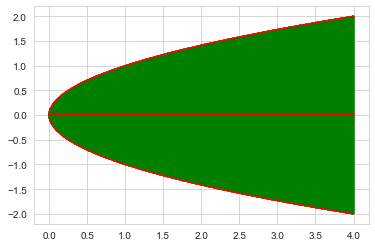

25.132741228718345

In [127]:
volume_benda_putar_x_slab(x, f, g)

In [131]:
a = 0
b = 3
n = 1000
x = np.linspace(a, b , n+1)

f = lambda x: 3 + 2*x - x**2
g = lambda x: np.array([0 for i in x]) # y = 0

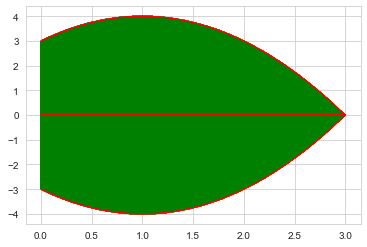

96.13274933703683

In [132]:
volume_benda_putar_x_slab(x, f, g)

## Volume Benda Putar (Y-Axis) Horizontal Slicing (dy)

In [165]:
a = 0
b = 10
n = 1000
y = np.linspace(a, b, n+1)
x1 = lambda y: 10/4 * y
x2 = lambda y: np.array([0 for i in range(len(y))])

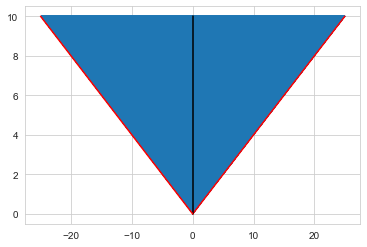

6535.170490428612


In [166]:
def volume_benda_putar_y(x1, x2, y):
    luas_besar = 0
    luas_besar_list = []
    
    plt.plot(x1, y, c='red')
    plt.plot(x2, y, c='black')
    plt.plot(-x1, y, c='red')
    
    for i in range(len(y)-1):
        if x1[i] >= x2[i]:
            x_max_before = x1[i]
            x_min_before = x2[i]
            x_max_after = x1[i+1]
            x_min_after = x2[i+1]
            distance = y[i+1] - y[i]
            luas = np.pi * ((x_max_before - x_min_before)**2) * distance
            luas_besar += luas
            luas_besar_list.append(luas)
            
        else:
            x_max_before = x2[i]
            x_min_before = x1[i]
            x_max_after = x2[i+1]
            x_min_after = x1[i+1]
            distance = y[i+1] - y[i]
            luas = np.pi * ((x_max_before - x_min_before)**2) * distance
            luas_besar += luas
            luas_besar_list.append(luas)
            pass
        
        plt.hlines(y=y[i], xmax=x_max_before, xmin=x_min_before)
        plt.hlines(y=y[i+1], xmax=x_max_before, xmin=x_min_before)
        plt.hlines(y=y[i], xmax=-x_max_before, xmin=-x_min_before)
        plt.hlines(y=y[i+1], xmax=-x_max_before, xmin=-x_min_before)
        plt.vlines(x=x_max_before, ymax=y[i+1], ymin=y[i])
        
        
    plt.show()
    
    print(luas_besar)
    

volume_benda_putar_y(x1=x1(y), x2=x2(y), y=y)

In [63]:
a = -2
b = 2
n = 1000
y = np.linspace(a, b, n+1)
x1 = lambda y: (4 - y**2)**(0.5)
x2 = lambda y: [0 for i in range(len(y))] # x = 0

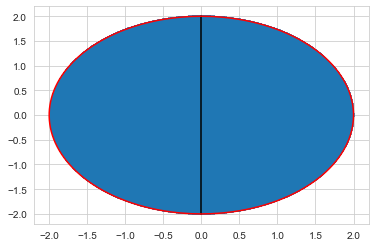

33.51028812796944


In [64]:
volume_benda_putar_y(x1=x1(y), x2=x2(y), y=y)

In [10]:
a = 0
b = 4
n = 1000
y = np.linspace(a, b, n+1)
x1 = lambda y: 10000 * np.pi * (y**2 /16) * (4-y)
x2 = lambda y: np.array([0 for i in y]) # x = 0

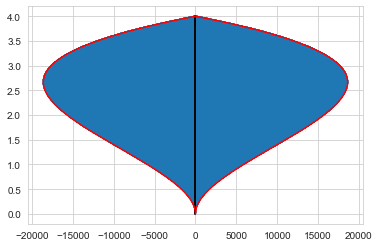

1889906388.125946


In [11]:
def volume_benda_putar_dy_thd_x(x1, x2, y, thd_x):
    luas_besar = 0
    luas_besar_list = []
    
    
    d = 0
    if np.abs(x1[0] - thd_x) <= np.abs(x2[0] - thd_x): # distance dari x1 lebih dekat
        d = np.abs(x1[0] - thd_x)
    else:
        d = np.abs(x2[0] - thd_x)
        
    plt.plot(x1, y, c='red')
    plt.plot(x2, y, c='black')
    plt.plot(x2-d, y, c='black')
    plt.plot(-x1-d, y, c='red')
    
    for i in range(len(y)-1):
        if x1[i] >= x2[i]:
            x_max_before = x1[i]
            x_min_before = x2[i]
            x_max_after = x1[i+1]
            x_min_after = x2[i+1]
            distance = y[i+1] - y[i]
            luas = (np.pi * (d + x_max_before - x_min_before)**2 * distance) - (np.pi * (d**2) * distance)
            luas_besar += luas
            luas_besar_list.append(luas)
            
        else:
            x_max_before = x2[i]
            x_min_before = x1[i]
            x_max_after = x2[i+1]
            x_min_after = x1[i+1]
            distance = y[i+1] - y[i]
            luas = (np.pi * (d + x_max_before - x_min_before)**2 * distance) - (np.pi * (d**2) * distance)
            luas_besar += luas
            luas_besar_list.append(luas)
            pass
        
        plt.hlines(y=y[i], xmax=x_max_before, xmin=x_min_before)
        plt.hlines(y=y[i+1], xmax=x_max_before, xmin=x_min_before)
        plt.hlines(y=y[i], xmax= -x_max_before -d, xmin= -x_min_before -d)
        plt.hlines(y=y[i+1], xmax= -x_max_before -d, xmin= -x_min_before -d)
        plt.vlines(x=x_max_before, ymax=y[i+1], ymin=y[i])
        plt.vlines(x=-x_max_before-d, ymax=y[i+1], ymin=y[i])
        
        
    plt.show()
    
    print(luas_besar)
    

volume_benda_putar_dy_thd_x(x1=x1(y), x2=x2(y), y=y, thd_x=0)

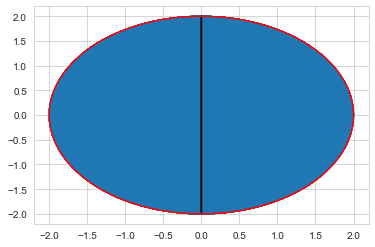

33.51031791492213


In [67]:
volume_benda_putar_dy_thd_x(x1=x1(y), x2=x2(y), y=y, thd_x=0)

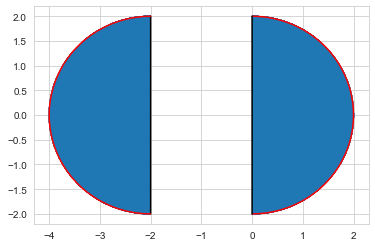

112.46664438490896


In [68]:
volume_benda_putar_dy_thd_x(x1=x1(y), x2=x2(y), y=y, thd_x=-2)

## Method of Shells (dipotong sejajar sb-x (dx) diputar thd sb-y)

In [32]:
a = 1
b = 2
n = 1000
x = np.linspace(a, b , n+1)

f = lambda x: 4 - x
g = lambda x: [0 for i in x]

In [33]:
def shell_method_x_neg(x, y, g, thd_x):
    luas_besar = 0
    luas_besar_list = []
    
    d = np.abs(x[0] - thd_x)
    plt.plot(x, y, c='red')
    plt.plot(x, g, c='red')
    plt.plot(-x-d, y, c='red')
    plt.plot(-x-d, g, c='red')
    
    for i in range(len(x)-1):
        if y[i] >= g[i]:
            upper = y
            lower = g
            luas_kecil = 2 * np.pi * (upper[i+1]-lower[i+1]) * (x[i+1] - x[i]) * (x[i+1]-thd_x)
            luas_besar += luas_kecil
            luas_besar_list.append(luas_kecil)
        else:
            upper = g
            lower = y
            luas_kecil = 2 * np.pi * (upper[i+1]-lower[i+1]) * (x[i+1] - x[i]) * (x[i+1]-thd_x)
            luas_besar += luas_kecil
            luas_besar_list.append(luas_kecil)
            
        plt.vlines(x=x[i], ymax=upper[i+1], ymin=lower[i+1], colors='green')
        plt.vlines(x=x[i+1], ymax=upper[i+1], ymin=lower[i+1], colors='green')
        plt.hlines(y=upper[i+1], xmax=x[i+1], xmin=x[i], colors='green')
        plt.hlines(y=lower[i+1], xmax=x[i+1], xmin=x[i], colors='green')
        
        plt.vlines(x=-x[i]-d, ymax=upper[i+1], ymin=lower[i+1], colors='green')
        plt.vlines(x=-x[i+1]-d, ymax=upper[i+1], ymin=lower[i+1], colors='green')
        plt.hlines(y=upper[i+1], xmax=-x[i+1]-d, xmin=-x[i]-d, colors='green')
        plt.hlines(y=lower[i+1], xmax=-x[i+1]-d, xmin=-x[i]-d, colors='green')
        
        
    plt.show()
    
    print(f'Luas : {np.abs(luas_besar)}')

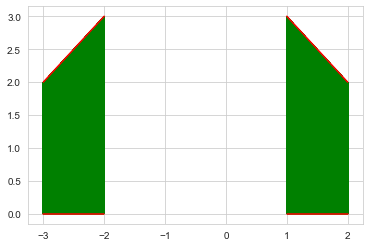

Luas : 23.041486671781193


In [34]:
shell_method_x_neg(x=x, y=f(x), g=g(x), thd_x=0)

In [35]:
7.86 + 23.04

30.9

In [36]:
59/6 * np.pi

30.892327760299633

In [39]:
178/15 * np.pi

37.28023282259888

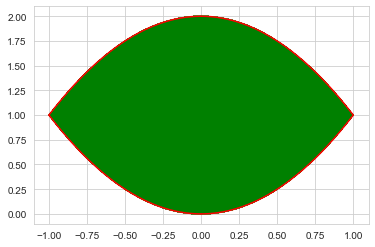

Luas : 3.141589511997138


In [148]:
shell_method_x_neg(x=x, y=f(x), g=g(x), thd_x=0)

In [155]:
a = 0
b = 3
n = 1000
x = np.linspace(a, b , n+1)

f = lambda x: 3 + 2*x - x**2
g = lambda x: np.array([0 for i in x]) # y = 0

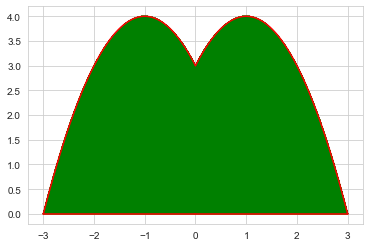

Luas : 70.68576401993556


In [156]:
shell_method_x_neg(x=x, y=f(x), g=g(x), thd_x=0)

In [157]:
def shell_method_x_pos(x, y, g, thd_x):
    luas_besar = 0
    luas_besar_list = []
    
    d = np.abs(x[0] - thd_x)
    plt.plot(x, y, c='red')
    plt.plot(x, g, c='red')
    plt.plot(-x+(2*d), y, c='red')
    plt.plot(-x+(2*d), g, c='red')
    
    for i in range(len(x)-1):
        if y[i] >= g[i]:
            upper = y
            lower = g
            luas_kecil = 2 * np.pi * (upper[i+1]-lower[i+1]) * (x[i+1] - x[i]) * (x[i+1]-thd_x)
            luas_besar += luas_kecil
            luas_besar_list.append(luas_kecil)
        else:
            upper = g
            lower = y
            luas_kecil = 2 * np.pi * (upper[i+1]-lower[i+1]) * (x[i+1] - x[i]) * (x[i+1]-thd_x)
            luas_besar += luas_kecil
            luas_besar_list.append(luas_kecil)
            
        plt.vlines(x=x[i], ymax=upper[i+1], ymin=lower[i+1], colors='green')
        plt.vlines(x=x[i+1], ymax=upper[i+1], ymin=lower[i+1], colors='green')
        plt.hlines(y=upper[i+1], xmax=x[i+1], xmin=x[i], colors='green')
        plt.hlines(y=lower[i+1], xmax=x[i+1], xmin=x[i], colors='green')
        
        plt.vlines(x=-x[i]+(2*d), ymax=upper[i+1], ymin=lower[i+1], colors='green')
        plt.vlines(x=-x[i+1]+(2*d), ymax=upper[i+1], ymin=lower[i+1], colors='green')
        plt.hlines(y=upper[i+1], xmax=-x[i+1]+(2*d), xmin=-x[i]+(2*d), colors='green')
        plt.hlines(y=lower[i+1], xmax=-x[i+1]+(2*d), xmin=-x[i]+(2*d), colors='green')
        
        
    plt.show()
    
    print(f'Luas : {np.abs(luas_besar)}')

In [158]:
a = 0
b = 3
n = 1000
x = np.linspace(a, b , n+1)

f = lambda x: 3 + 2*x - x**2
g = lambda x: np.array([0 for i in x]) # y = 0

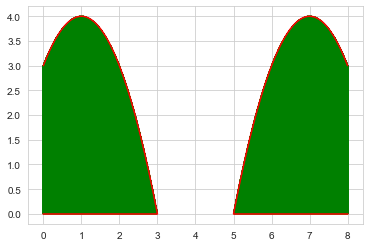

Luas : 155.3956966056647


In [159]:
shell_method_x_pos(x=x, y=f(x), g=g(x), thd_x=4)

## Center of mass (continuous mass)

In [8]:
a = 0
b = 25
n =10000
x = np.linspace(a, b, n+1)
ro = x**0.5

In [9]:
def center_of_mass(ro, a, b):
    momen_total = 0
    mass_total = 0
    for i in range(len(x)-1):
        momen = ro[i+1] * (x[i+1] - x[i]) * (x[i+1]-a) # mass (ro * dx) * distance
        mass = ro[i+1] * (x[i+1] - x[i]) # ro * dx
        momen_total += momen
        mass_total += mass
    return momen_total/mass_total

In [10]:
center_of_mass(ro, a, b)

15.000754658479915

## Lamina center of mass

In [17]:
a = 0
b = 5
n = 10000
x = np.linspace(a, b, n+1)
f = lambda x: 3 - x
g = lambda x: 0.5*x + 3

In [18]:
np.argwhere(np.isclose(f(x), g(x))).tolist()

[[0]]

In [170]:
def lamina_com(f, g, x):
    loc = np.argwhere(np.isclose(f, g)).tolist()
    total_momen_x = 0
    total_mass_x = 0
    
    total_momen_y = 0
    total_mass_y = 0
    for i in range(loc[0][0], loc[1][0]-1):
        if f[i] >= g[i]:
            momen_x = (x[i+1] - x[i]) * (f[i] - g[i]) * ((x[i+1] + x[i])/2)
            mass_x = (x[i+1] - x[i]) * (f[i] - g[i])
            total_momen_x += momen_x
            total_mass_x += mass_x
                
            momen_y = (x[i+1] - x[i]) * (f[i] - g[i]) * ((f[i] + g[i])/2)
            mass_y = (x[i+1] - x[i]) * (f[i] - g[i])
            total_momen_y += momen_y
            total_mass_y += mass_y
        else:
            momen_x = (x[i+1] - x[i]) * (g[i] - f[i]) * ((x[i+1] + x[i])/2)
            mass_x = (x[i+1] - x[i]) * (g[i] - f[i])
            total_momen_x += momen_x
            total_mass_x += mass_x
                
            momen_y = (x[i+1] - x[i]) * (g[i] - f[i]) * ((g[i] + f[i])/2)
            mass_y = (x[i+1] - x[i]) * (g[i] - f[i])
            total_momen_y += momen_y
            total_mass_y += mass_y
            
    plt.plot(x[loc[0][0]: loc[1][0]-1], f[loc[0][0]: loc[1][0]-1])
    plt.plot(x[loc[0][0]: loc[1][0]-1], g[loc[0][0]: loc[1][0]-1])
    return total_momen_x/total_mass_x, total_momen_y/total_mass_y
    

(0.4802518334311767, 0.42857286750262225)

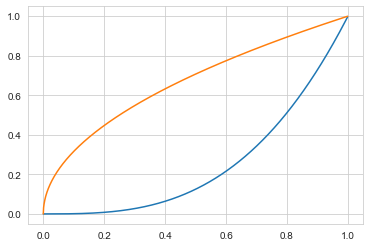

In [171]:
lamina_com(f(x), g(x), x)

In [165]:
np.pi/2

1.5707963267948966

## Sigma

In [2]:
a = 1
b = 6

total = 0
for i in range(a, b+1):
    func = (i - 1)
    total += func

In [3]:
total

15

In [6]:
a = 1
b = 7

total = 0
for i in range(a, b+1):
    func = 1 / (i + 1)
    total += func

In [7]:
total

1.7178571428571427

In [8]:
a = 1
b = 8

total = 0
for i in range(a, b+1):
    func =(-1)**i * 2**(i-2)
    total += func

In [9]:
total

42.5

In [10]:
a = 1
b = 6

total = 0
for i in range(a, b+1):
    func = i * np.cos(np.pi * i)
    total += func

In [11]:
total

3.0

In [12]:
a = 1
b = 6

total = 0
for i in range(a, b+1):
    func = i**2
    total += func

In [13]:
total

91

In [14]:
a = 3
b = 8

total = 0
for i in range(a, b+1):
    func = (i+1)**2
    total += func

print(total)

271


In [19]:
a = 3
b = 7

total = 0
for i in range(a, b+1):
    func = ((-1)**i * 2**i)/(i + 1)
    total += func

print(total)

-10.99047619047619


In [21]:
a = -1
b = 6

total = 0
for i in range(a, b+1):
    func = i * np.sin(i * np.pi / 2)
    total += func

print(total)

4.000000000000002


In [22]:
a = 1
b = 41

total = 0
for i in range(a, b+1):
    func = i 
    total += func

print(total)

861


In [24]:
a = 2
b = 50

total = 0
for i in range(a, b+1, 2):
    func = i 
    total += func

print(total)

650


In [25]:
a = 1
b = 100

total = 0
for i in range(a, b+1):
    func = 1/i
    total += func

print(total)

5.187377517639621


In [36]:
a = 1
b = 100

total_ganjil = 0
total_genap = 0

for i in range(a, b+1, 2):
    func = 1/i
    total_ganjil += func

for i in range(a+1, b+1, 2):
    func_g = 1/i
    total_genap -= func_g

print(total_ganjil + total_genap)

0.6881721793101954


In [37]:
a = 1
b = 10

total = 0
for i in range(a, b+1):
    func = i
    total += func

print(total)

55


In [53]:
31/8

3.875